## Algoritmos Desenvolvidos: Hill-Climbing with Restart, Simulated nnealing e Genetic Algorithm

#### Descricao
Este projeto visa comparar o desempenho de
tres algoritmos de otimizacao: Hill-Climbing with
Restart ([HC-R]), Simulated Annealing ([SA]), e
Genetic Algorithm ([GA]). O objetivo  ́e desenvolver
e analisar o codigo implementado para o problema
das 8 rainhas. Os resultados ser ̃ao apresentados
em um breve relatorio, fornecendo insights sobre a
eficacia relativa de cada algoritmo.

In [2]:
import random
import math

def inicializa_tabuleiro():
    return [random.randint(1, 8) for _ in range(8)]

def calcula_custo(tabuleiro):
    custo = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if tabuleiro[i] == tabuleiro[j] or abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j):
                custo += 1
    return custo

def gera_vizinho(tabuleiro):
    novo_tabuleiro = tabuleiro.copy()
    col_a = random.randint(0, 7)
    col_b = random.randint(0, 7)
    novo_tabuleiro[col_a], novo_tabuleiro[col_b] = novo_tabuleiro[col_b], novo_tabuleiro[col_a]
    return novo_tabuleiro

def probabilidade_aceitacao(custo_atual, novo_custo, temperatura):
    if novo_custo < custo_atual:
        return 1.0
    else:
        return math.exp((custo_atual - novo_custo) / temperatura)

def hill_climbing_with_restart(iteracoes=1000, reinicio_a_cada=50):
    melhor_solucao = inicializa_tabuleiro()
    melhor_custo = calcula_custo(melhor_solucao)

    iteracoes_sem_melhora = 0
    iteracoes_totais = 0
    total_reinicios = 20
    temperatura = 1000.0
    taxa_resfriamento = 0.99

    for iteracao in range(iteracoes):
        novo_tabuleiro = gera_vizinho(melhor_solucao)
        novo_custo = calcula_custo(novo_tabuleiro)

        probabilidade_aceite = probabilidade_aceitacao(melhor_custo, novo_custo, temperatura)

        if random.random() < probabilidade_aceite:
            melhor_solucao = novo_tabuleiro
            melhor_custo = novo_custo
            iteracoes_sem_melhora = 0
        else:
            iteracoes_sem_melhora += 1

        iteracoes_totais += 1

        if iteracoes_totais % reinicio_a_cada == 0:
            melhor_solucao = inicializa_tabuleiro()
            melhor_custo = calcula_custo(melhor_solucao)
            iteracoes_sem_melhora = 0

        temperatura *= taxa_resfriamento

    return melhor_solucao, melhor_custo

def simulated_annealing(iteracoes=1000, temperatura_inicial=1000.0, taxa_resfriamento=0.99):
    melhor_solucao = inicializa_tabuleiro()
    melhor_custo = calcula_custo(melhor_solucao)

    temperatura = temperatura_inicial

    for iteracao in range(iteracoes):
        novo_tabuleiro = gera_vizinho(melhor_solucao)
        novo_custo = calcula_custo(novo_tabuleiro)

        probabilidade_aceite = probabilidade_aceitacao(melhor_custo, novo_custo, temperatura)

        if random.random() < probabilidade_aceite:
            melhor_solucao = novo_tabuleiro
            melhor_custo = novo_custo

        temperatura *= taxa_resfriamento

    return melhor_solucao, melhor_custo

def crossover(pai1, pai2):
    ponto_corte = random.randint(0, 7)
    filho = pai1[:ponto_corte] + pai2[ponto_corte:]
    return filho

def mutacao(filho):
    filho_mutado = filho.copy()
    ponto_mutacao = random.randint(0, 7)
    filho_mutado[ponto_mutacao] = random.randint(1, 8)
    return filho_mutado

def algoritmo_genetico(tamanho_populacao=20, geracoes=50, probabilidade_mutacao=0.2):
    populacao = [inicializa_tabuleiro() for _ in range(tamanho_populacao)]

    for geracao in range(geracoes):
        populacao.sort(key=lambda x: calcula_custo(x))
        nova_populacao = []

        for i in range(0, len(populacao) - 1, 2):
            pai1 = populacao[i]
            pai2 = populacao[i + 1]
            filho = crossover(pai1, pai2)

            if random.random() < probabilidade_mutacao:
                filho = mutacao(filho)

            nova_populacao.append(filho)

        if len(populacao) % 2 == 1:
            nova_populacao.append(populacao[-1])

        populacao = nova_populacao

    melhor_solucao = min(populacao, key=lambda x: calcula_custo(x))
    melhor_custo = calcula_custo(melhor_solucao)

    return melhor_solucao, melhor_custo




## Executando e Plotando Resultados

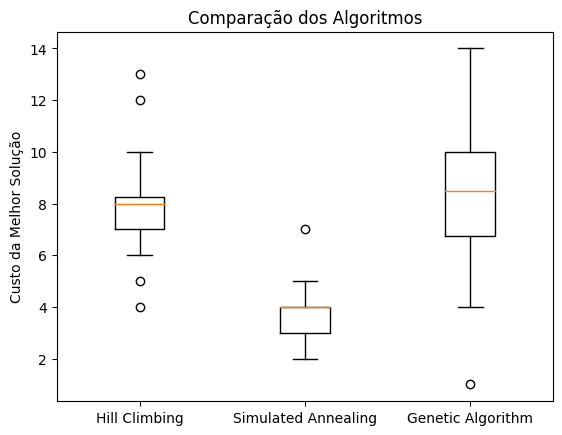

Tabela de Sumarização de Resultados:


,Hill Climbing,Simulated Annealing,Genetic Algorithm
Mínimo,2.000000,0.000000,3.000000
Máximo,15.000000,13.000000,20.000000
Mediana,8.000000,4.000000,9.000000
Desvio Padrão,2.356714,1.925974,2.606184


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def executar_algoritmo(algoritmo, iteracoes):
    resultados = []
    for _ in range(iteracoes):
        _, custo = algoritmo()
        resultados.append(custo)
    return resultados

def plotar_boxplots(resultados_hc, resultados_sa, resultados_ga):
    dados = [resultados_hc, resultados_sa, resultados_ga]

    fig, ax = plt.subplots()
    ax.boxplot(dados, labels=['Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm'])
    ax.set_ylabel('Custo da Melhor Solução')
    ax.set_title('Comparação dos Algoritmos')

    plt.show()

def sumarizar_resultados(resultados):
    resultados_aplanados = [item for sublist in resultados for item in sublist]
    sumario = {
        'Mínimo': min(resultados_aplanados),
        'Máximo': max(resultados_aplanados),
        'Mediana': np.median(resultados_aplanados),
        'Desvio Padrão': np.std(resultados_aplanados)
    }
    return sumario

def executar_algoritmo_com_historico(algoritmo, iteracoes):
    historico = []
    for _ in range(iteracoes):
        _, custo = algoritmo()
        historico.append(custo)
    return historico

def main():
    iteracoes_boxplot = 20
    iteracoes_sumario = 20
    iteracoes_grafico = 50

    # Boxplot
    resultados_hc = executar_algoritmo(hill_climbing_with_restart, iteracoes_boxplot)
    resultados_sa = executar_algoritmo(simulated_annealing, iteracoes_boxplot)
    resultados_ga = executar_algoritmo(algoritmo_genetico, iteracoes_boxplot)
    plotar_boxplots(resultados_hc, resultados_sa, resultados_ga)




    # Sumarização de Resultados
    resultados_hc_sumario = [executar_algoritmo(hill_climbing_with_restart, iteracoes_sumario) for _ in range(iteracoes_sumario)]
    resultados_sa_sumario = [executar_algoritmo(simulated_annealing, iteracoes_sumario) for _ in range(iteracoes_sumario)]
    resultados_ga_sumario = [executar_algoritmo(algoritmo_genetico, iteracoes_sumario) for _ in range(iteracoes_sumario)]

    sumario_hc = sumarizar_resultados(resultados_hc_sumario)
    sumario_sa = sumarizar_resultados(resultados_sa_sumario)
    sumario_ga = sumarizar_resultados(resultados_ga_sumario)

    dados = {
        'Hill Climbing': sumario_hc,
        'Simulated Annealing': sumario_sa,
        'Genetic Algorithm': sumario_ga
    }

    df_sumario = pd.DataFrame(dados)
    print("Tabela de Sumarização de Resultados:")
    styled_df = df_sumario.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2')]}
    ]).format({
        'Mínimo': '{:.6f}',
        'Máximo': '{:.6f}',
        'Mediana': '{:.6f}',
        'Desvio Padrão': '{:.6f}'
    })

    display(styled_df)


    # Gráfico de Evolução
    dados_historico = []

    for i in range(iteracoes_sumario):
        historico_hc = executar_algoritmo_com_historico(hill_climbing_with_restart, iteracoes_grafico)
        dados_historico.extend([(i + 1, 'Hill Climbing', chamada, valor) for chamada, valor in enumerate(historico_hc, start=1)])

    for i in range(iteracoes_sumario):
        historico_sa = executar_algoritmo_com_historico(simulated_annealing, iteracoes_grafico)
        dados_historico.extend([(i + 1, 'Simulated Annealing', chamada, valor) for chamada, valor in enumerate(historico_sa, start=1)])

    for i in range(iteracoes_sumario):
        historico_ga = executar_algoritmo_com_historico(algoritmo_genetico, iteracoes_grafico)
        dados_historico.extend([(i + 1, 'Genetic Algorithm', chamada, valor) for chamada, valor in enumerate(historico_ga, start=1)])

    df_historico = pd.DataFrame(dados_historico, columns=['Execução', 'Algoritmo', 'Número de Chamadas', 'Melhor Valor'])


    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df_historico, x='Número de Chamadas', y='Melhor Valor', hue='Algoritmo', ci=None)
    plt.title('Evolução da Função Objetivo')
    plt.xlabel('Número de Chamadas à Função Objetivo')
    plt.ylabel('Melhor Valor da Função Objetivo')
    plt.legend(title='Algoritmo', bbox_to_anchor=(1, 1))
    plt.show()


if __name__ == '__main__':
    main()
